In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
% matplotlib inline


UsageError: Line magic function `%` not found.


In [4]:
dbdata=pd.read_csv('diabetes.csv')

In [5]:
dbdata.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
dbdata.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
features=[feature for feature in dbdata.columns if feature != 'Outcome']

In [8]:
features

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [9]:
for feature in features:
    print(feature, ':',len(dbdata[feature].unique()))

Pregnancies : 17
Glucose : 136
BloodPressure : 47
SkinThickness : 51
Insulin : 186
BMI : 248
DiabetesPedigreeFunction : 517
Age : 52


In [10]:
for feature in features:
    print(np.dtype(dbdata[feature]))

int64
int64
int64
int64
int64
float64
float64
int64


In [11]:
descrete_features=[feature for feature in features if len(dbdata[feature].unique())<=25]

In [12]:
continous_features=[feature for feature in features if feature not in descrete_features]

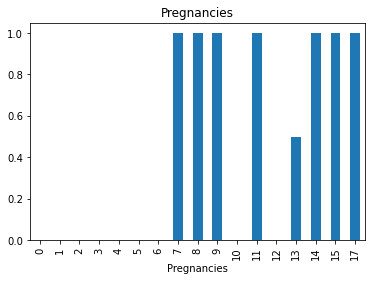

In [13]:
for feature in descrete_features:
    dbdata.groupby(feature)['Outcome'].median().plot.bar()
    plt.title(feature)
    plt.show()

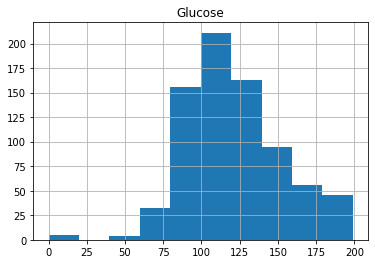

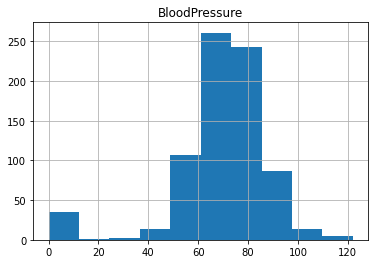

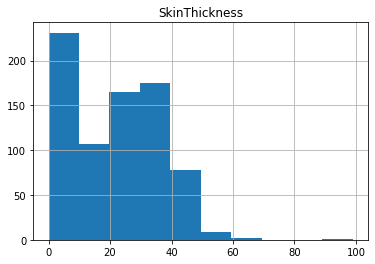

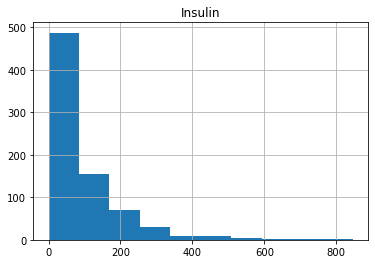

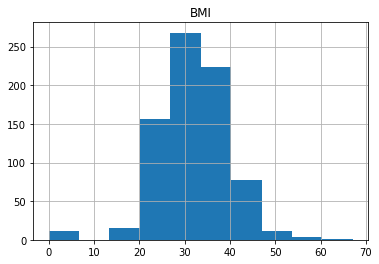

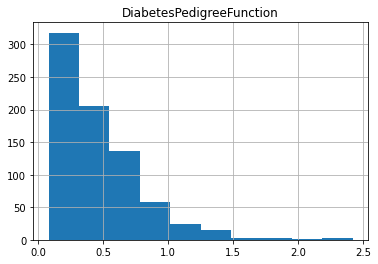

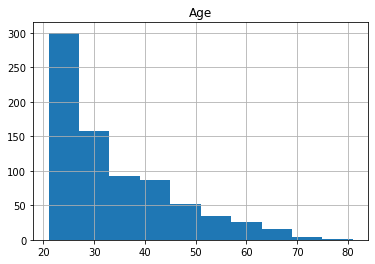

In [14]:
for feature in continous_features:
    dbdata[feature].hist()
    plt.title(feature)
    plt.show()


In [15]:
X=dbdata.drop('Outcome',axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [16]:
Y=dbdata.Outcome

In [17]:
X=np.array(X)
Y=np.array(Y)

In [81]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.model_selection import cross_val_score

In [45]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
reg = LogisticRegression()

In [48]:
reg.fit(X_train,Y_train)

C:\Users\KARTIK\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [49]:
predicted=reg.predict(X_test)

In [50]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [51]:
print(confusion_matrix(Y_test,predicted))

[[133  22]
 [ 36  40]]


In [52]:
print(accuracy_score(Y_test,predicted))

0.7489177489177489


In [53]:
model = LogisticRegression()

In [54]:
predict= cross_validate(model,X,Y,cv=100)

C:\Users\KARTIK\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\KARTIK\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\KARTIK\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\KARTIK\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\KARTIK\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\KARTIK\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\KARTIK\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\KARTIK\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\KARTIK\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\KARTIK\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\KARTIK\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\KARTIK\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

In [55]:
predict.keys()

dict_keys(['fit_time', 'score_time', 'test_score'])

In [56]:
predict['fit_time'].mean()

0.02735128402709961

In [57]:
predict['score_time'].mean()

0.0005493044853210449

In [58]:
predict['test_score'].mean()

0.7764285714285714

In [59]:
from sklearn.model_selection import GridSearchCV


In [60]:
model=LogisticRegression()
param={'solver':['newton-cg', 'lbfgs', 'liblinear','saga','sag'],
      'C' : [100, 10, 1.0, 0.1, 0.01]
      }


In [61]:
grid=GridSearchCV(estimator=model,param_grid=param,cv=10,n_jobs=-1)

In [62]:
LogisticRegression().get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [63]:
grid.fit(X_test,Y_test)

C:\Users\KARTIK\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga',
                                    'sag']})

In [64]:
predict=grid.predict(X_test)

In [65]:
confusion_matrix(Y_test,predict)

array([[140,  15],
       [ 35,  41]], dtype=int64)

In [66]:
accuracy_score(Y_test,predict)

0.7835497835497836

In [67]:
from sklearn.neighbors import KNeighborsClassifier

In [68]:
classifier= KNeighborsClassifier(n_neighbors=15)

In [69]:
classifier.fit(X,Y)

KNeighborsClassifier(n_neighbors=15)

In [70]:
predict=classifier.predict(X_test)

In [71]:
confusion_matrix(Y_test,predict)

array([[135,  20],
       [ 36,  40]], dtype=int64)

In [72]:
accuracy_score(Y_test,predict)

0.7575757575757576

In [82]:
scores=[]
for k in range(1,100):
    knn=KNeighborsClassifier(n_neighbors=k)
    score=cross_val_score(knn,X,Y,cv=10,scoring='accuracy')
    scores.append(score.mean())

In [83]:
print('Optimal K value is:{}'.format(np.argmax(scores)-1))

Optimal K value is:15


In [84]:
from sklearn.naive_bayes import GaussianNB

In [85]:
model=GaussianNB()

In [86]:
GNB=model.fit(X_train,Y_train)

In [87]:
predicted=GNB.predict(X_test)

In [88]:
confusion_matrix(Y_test,predicted)

array([[132,  23],
       [ 34,  42]], dtype=int64)

In [89]:
accuracy_score(Y_test,predicted)

0.7532467532467533

In [90]:
model = GaussianNB()

In [91]:
params_NB = {'var_smoothing': np.logspace(-9,-9, num=50)}

In [92]:
grid=GridSearchCV(estimator=model,param_grid=params_NB,cv=10)

In [93]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25)

In [94]:
grid.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.e-09, 1.e-09, 1.e-09, 1.e-09, 1.e-09, 1.e-09, 1.e-09, 1.e-09,
       1.e-09, 1.e-09, 1.e-09, 1.e-09, 1.e-09, 1.e-09, 1.e-09, 1.e-09,
       1.e-09, 1.e-09, 1.e-09, 1.e-09, 1.e-09, 1.e-09, 1.e-09, 1.e-09,
       1.e-09, 1.e-09, 1.e-09, 1.e-09, 1.e-09, 1.e-09, 1.e-09, 1.e-09,
       1.e-09, 1.e-09, 1.e-09, 1.e-09, 1.e-09, 1.e-09, 1.e-09, 1.e-09,
       1.e-09, 1.e-09, 1.e-09, 1.e-09, 1.e-09, 1.e-09, 1.e-09, 1.e-09,
       1.e-09, 1.e-09])})

In [95]:
predict=grid.predict(X_test)

In [96]:
confusion_matrix(Y_test,predict)

array([[102,  27],
       [ 22,  41]], dtype=int64)

In [97]:
accuracy_score(Y_test,predict)

0.7447916666666666

In [98]:
from sklearn.svm import SVC

In [99]:
model = SVC()

In [100]:
model.fit(X_train,Y_train)

SVC()

In [101]:
predict=model.predict(X_test)

In [102]:
accuracy_score(Y_test,predict)

0.7916666666666666

In [103]:
param={
    'C':[0.1,1],
    'gamma':[1,0.1],
    'kernel':['rbf','poly','sigmoid']
}

In [4]:
#Do't RUn it consumes more CPU & TIME

#grid=GridSearchCV(estimator=model,param_grid=param,n_jobs=6)


In [5]:
#grid.fit(X_train,Y_train)

In [6]:
#predict=grid.predict(X_test)

In [7]:
#accuracy_score(Y_test,predict)